# Forecast tomorrow rain in Australia

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from utils.utils import BaselineRain
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, f1_score
from sklearn.metrics import plot_confusion_matrix
import lightgbm as lgb
import keras
from models import keras_models as km 

sns.set(style="darkgrid")
#sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
sns.set(rc={'axes.facecolor':'lightgrey'})

In [4]:
db = pd.read_csv('./data/weatherAUS.csv')

In [56]:
db.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,year,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,2008,12


In [5]:
db.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
print("Dimension of the dataset = ", db.shape)

Dimension of the dataset =  (145460, 23)


## Exploratory data analysis 

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


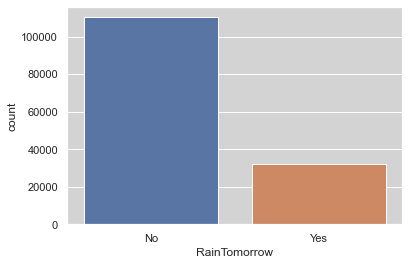

In [6]:
target = 'RainTomorrow'
ax = sns.countplot(x=target,data=db)
print(db[target].value_counts())

## Ex 1: 

Percentage of Rain/No Rain ? 

## Ex 2: 

Percentage of Rain/No Rain per location? 

In [8]:
db['Date'] = pd.to_datetime(db['Date'])
db['day'] = db['Date'].dt.day
db['year'] = db['Date'].dt.year
db['Month'] = db['Date'].dt.month

Text(0, 0.5, 'Counts')

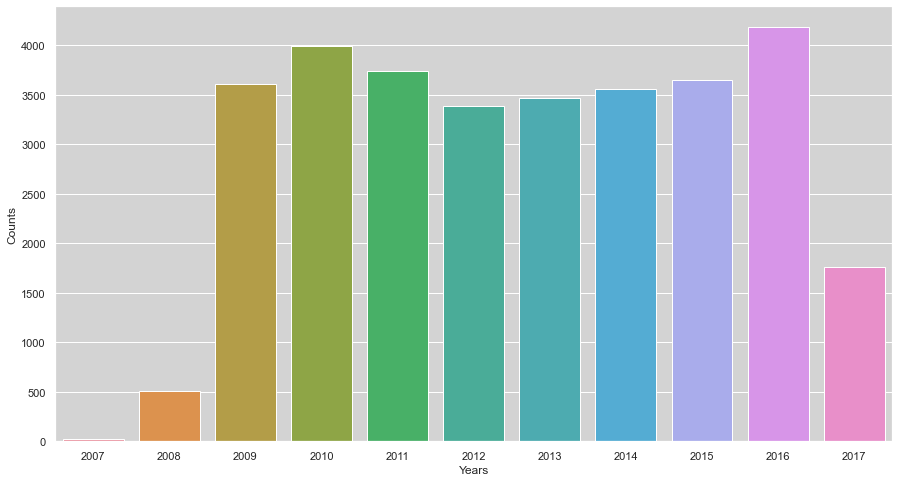

In [9]:
plt.figure(figsize=(15,8))
sns.countplot(data=db[db['RainTomorrow']=='Yes'],x='year');
plt.xlabel('Years')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

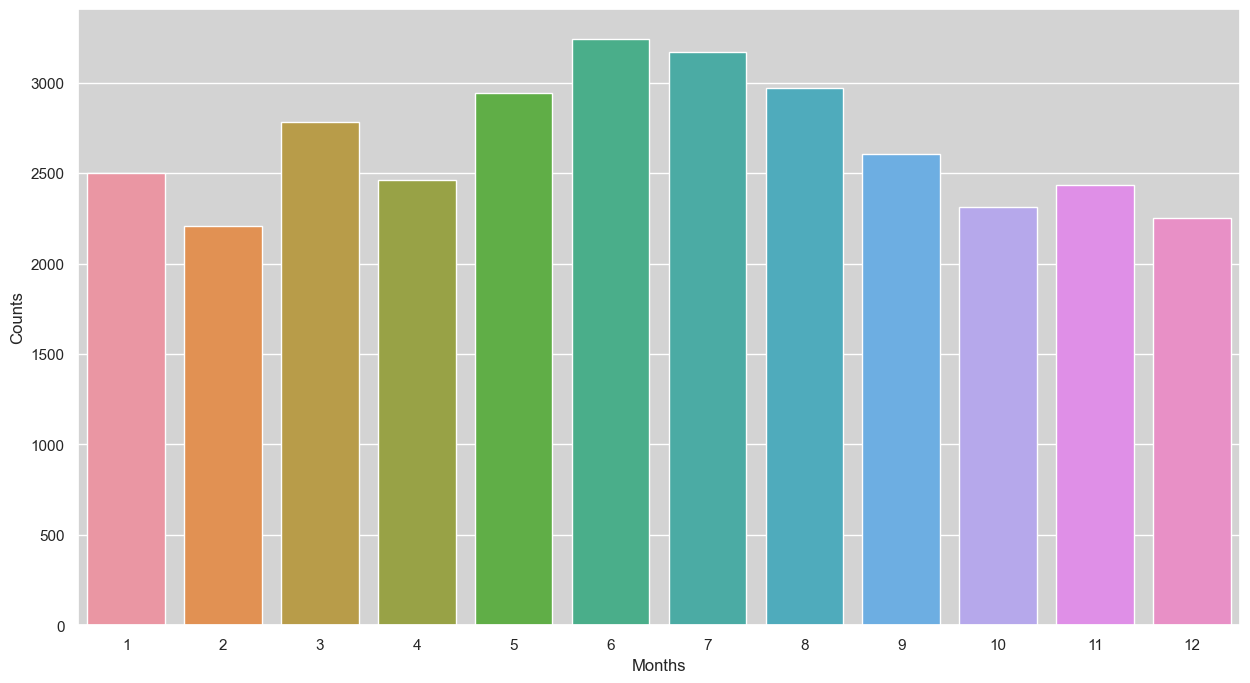

In [8]:
months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dece"]
plt.figure(figsize=(15,8))
sns.countplot(data=db[db['RainTomorrow']=='Yes'],x='Month');
plt.xlabel('Months')
plt.ylabel('Counts')

## Ex 3: 

Histogram of Rain per day? 

In [9]:
db["WindGustDir"].value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [10]:
rain_wind = db[db['RainTomorrow']=='Yes'].groupby("WindGustDir")["Rainfall"].mean()
norain_wind = db[db['RainTomorrow']=='No'].groupby("WindGustDir")["Rainfall"].mean()

<AxesSubplot: xlabel='WindGustDir'>

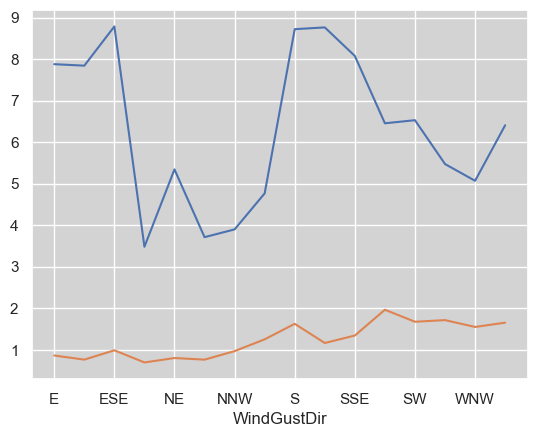

In [11]:
rain_wind.plot(grid=True)
norain_wind.plot(grid=True)


<AxesSubplot: xlabel='WindGustDir', ylabel='Rainfall'>

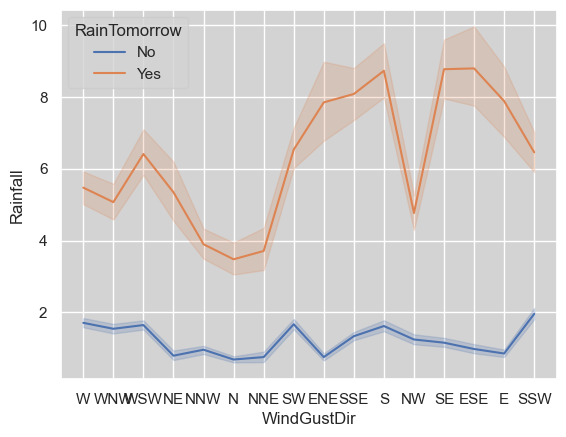

In [41]:
sns.lineplot(x="WindGustDir",y="Rainfall",hue="RainTomorrow",data=db)

<AxesSubplot: xlabel='day', ylabel='MinTemp'>

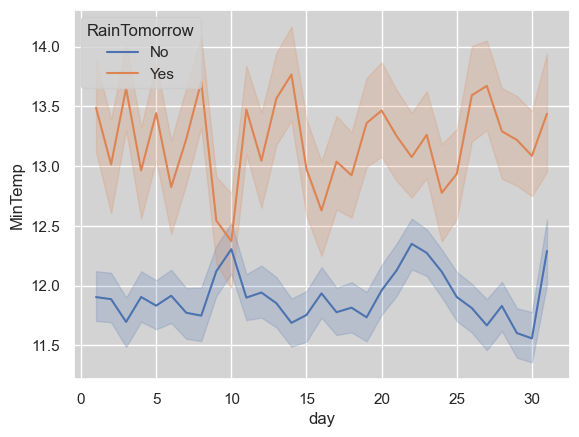

In [9]:
sns.lineplot(x="day",y="MinTemp",hue="RainTomorrow",data=db)

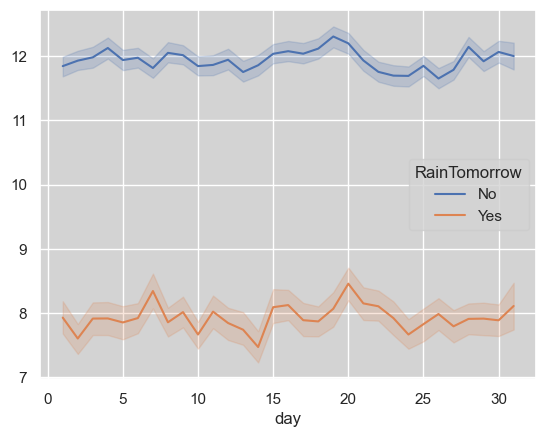

In [12]:
sns.lineplot(x=db["day"],y=(db["MaxTemp"]-db["MinTemp"]),hue=db["RainTomorrow"]);

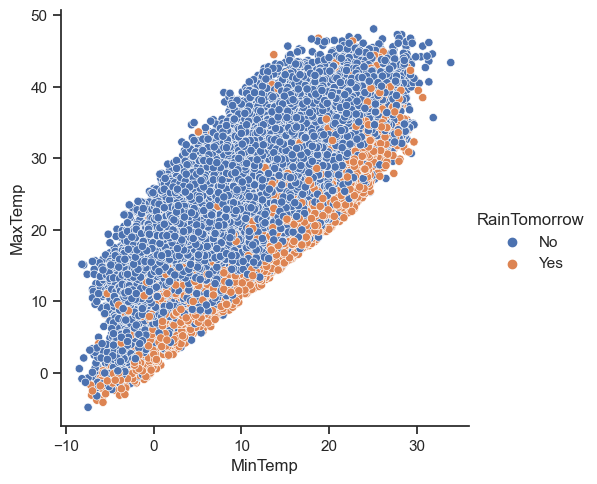

In [53]:
sns.set_style("ticks",{'axes.grid' : True})
sns.relplot(x='MinTemp', y = 'MaxTemp', hue = "RainTomorrow", data = db)
plt.grid()  
plt.show()

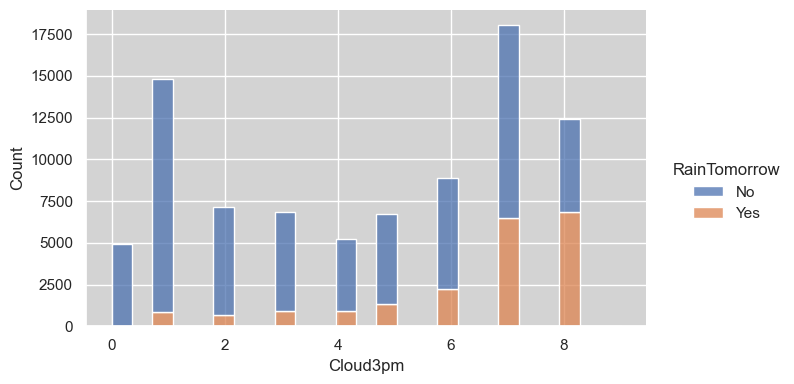

In [100]:
sns.displot(data = db, kind = 'hist', x = 'Cloud3pm', hue = 'RainTomorrow', multiple = 'stack',bins=25,height = 4, aspect = 1.7)

In [43]:
db.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'year', 'Month'],
      dtype='object')

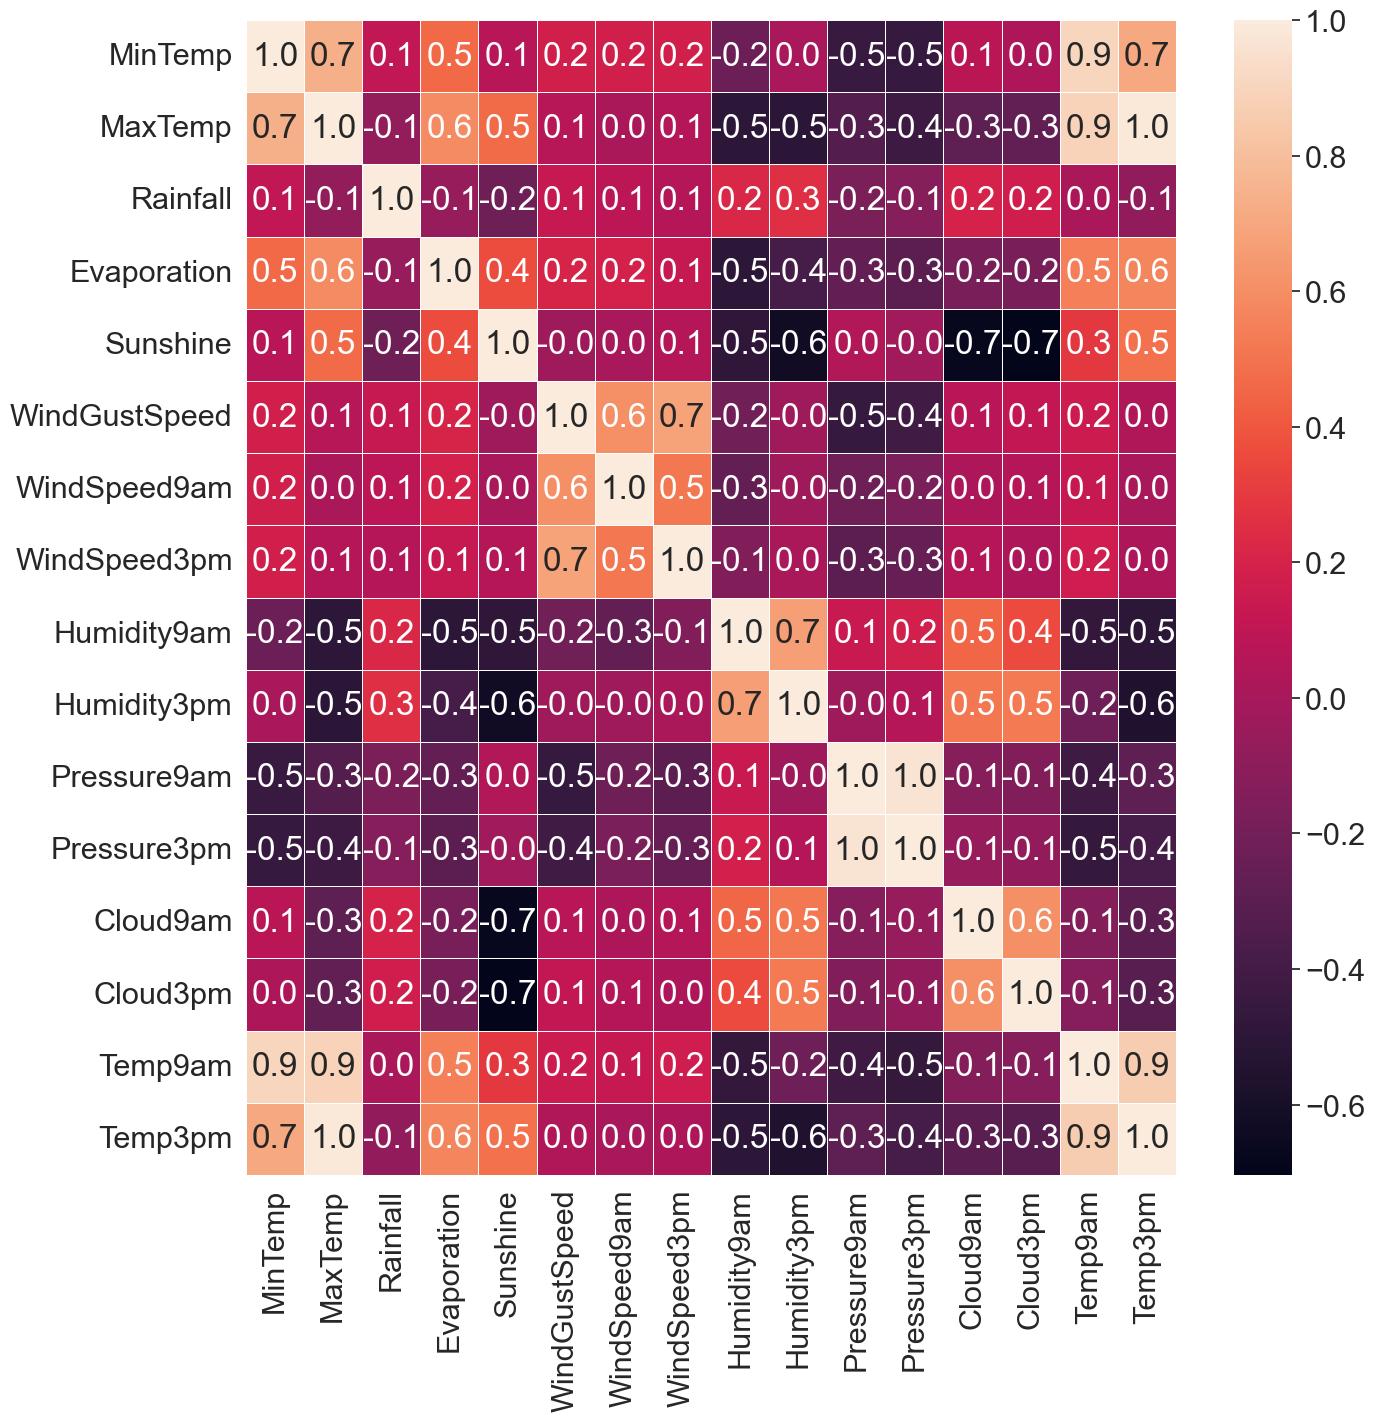

In [48]:
data_num = db.drop(['RainTomorrow','Date', 'Location', 'WindGustDir', 'WindDir9am', 
                          'WindDir3pm','RainToday', 'RainTomorrow', 'day', 'year', 'Month'],  axis=1)
corr = data_num.corr()
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
sns.set(font_scale=2)

array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>]],
      dtype=object)

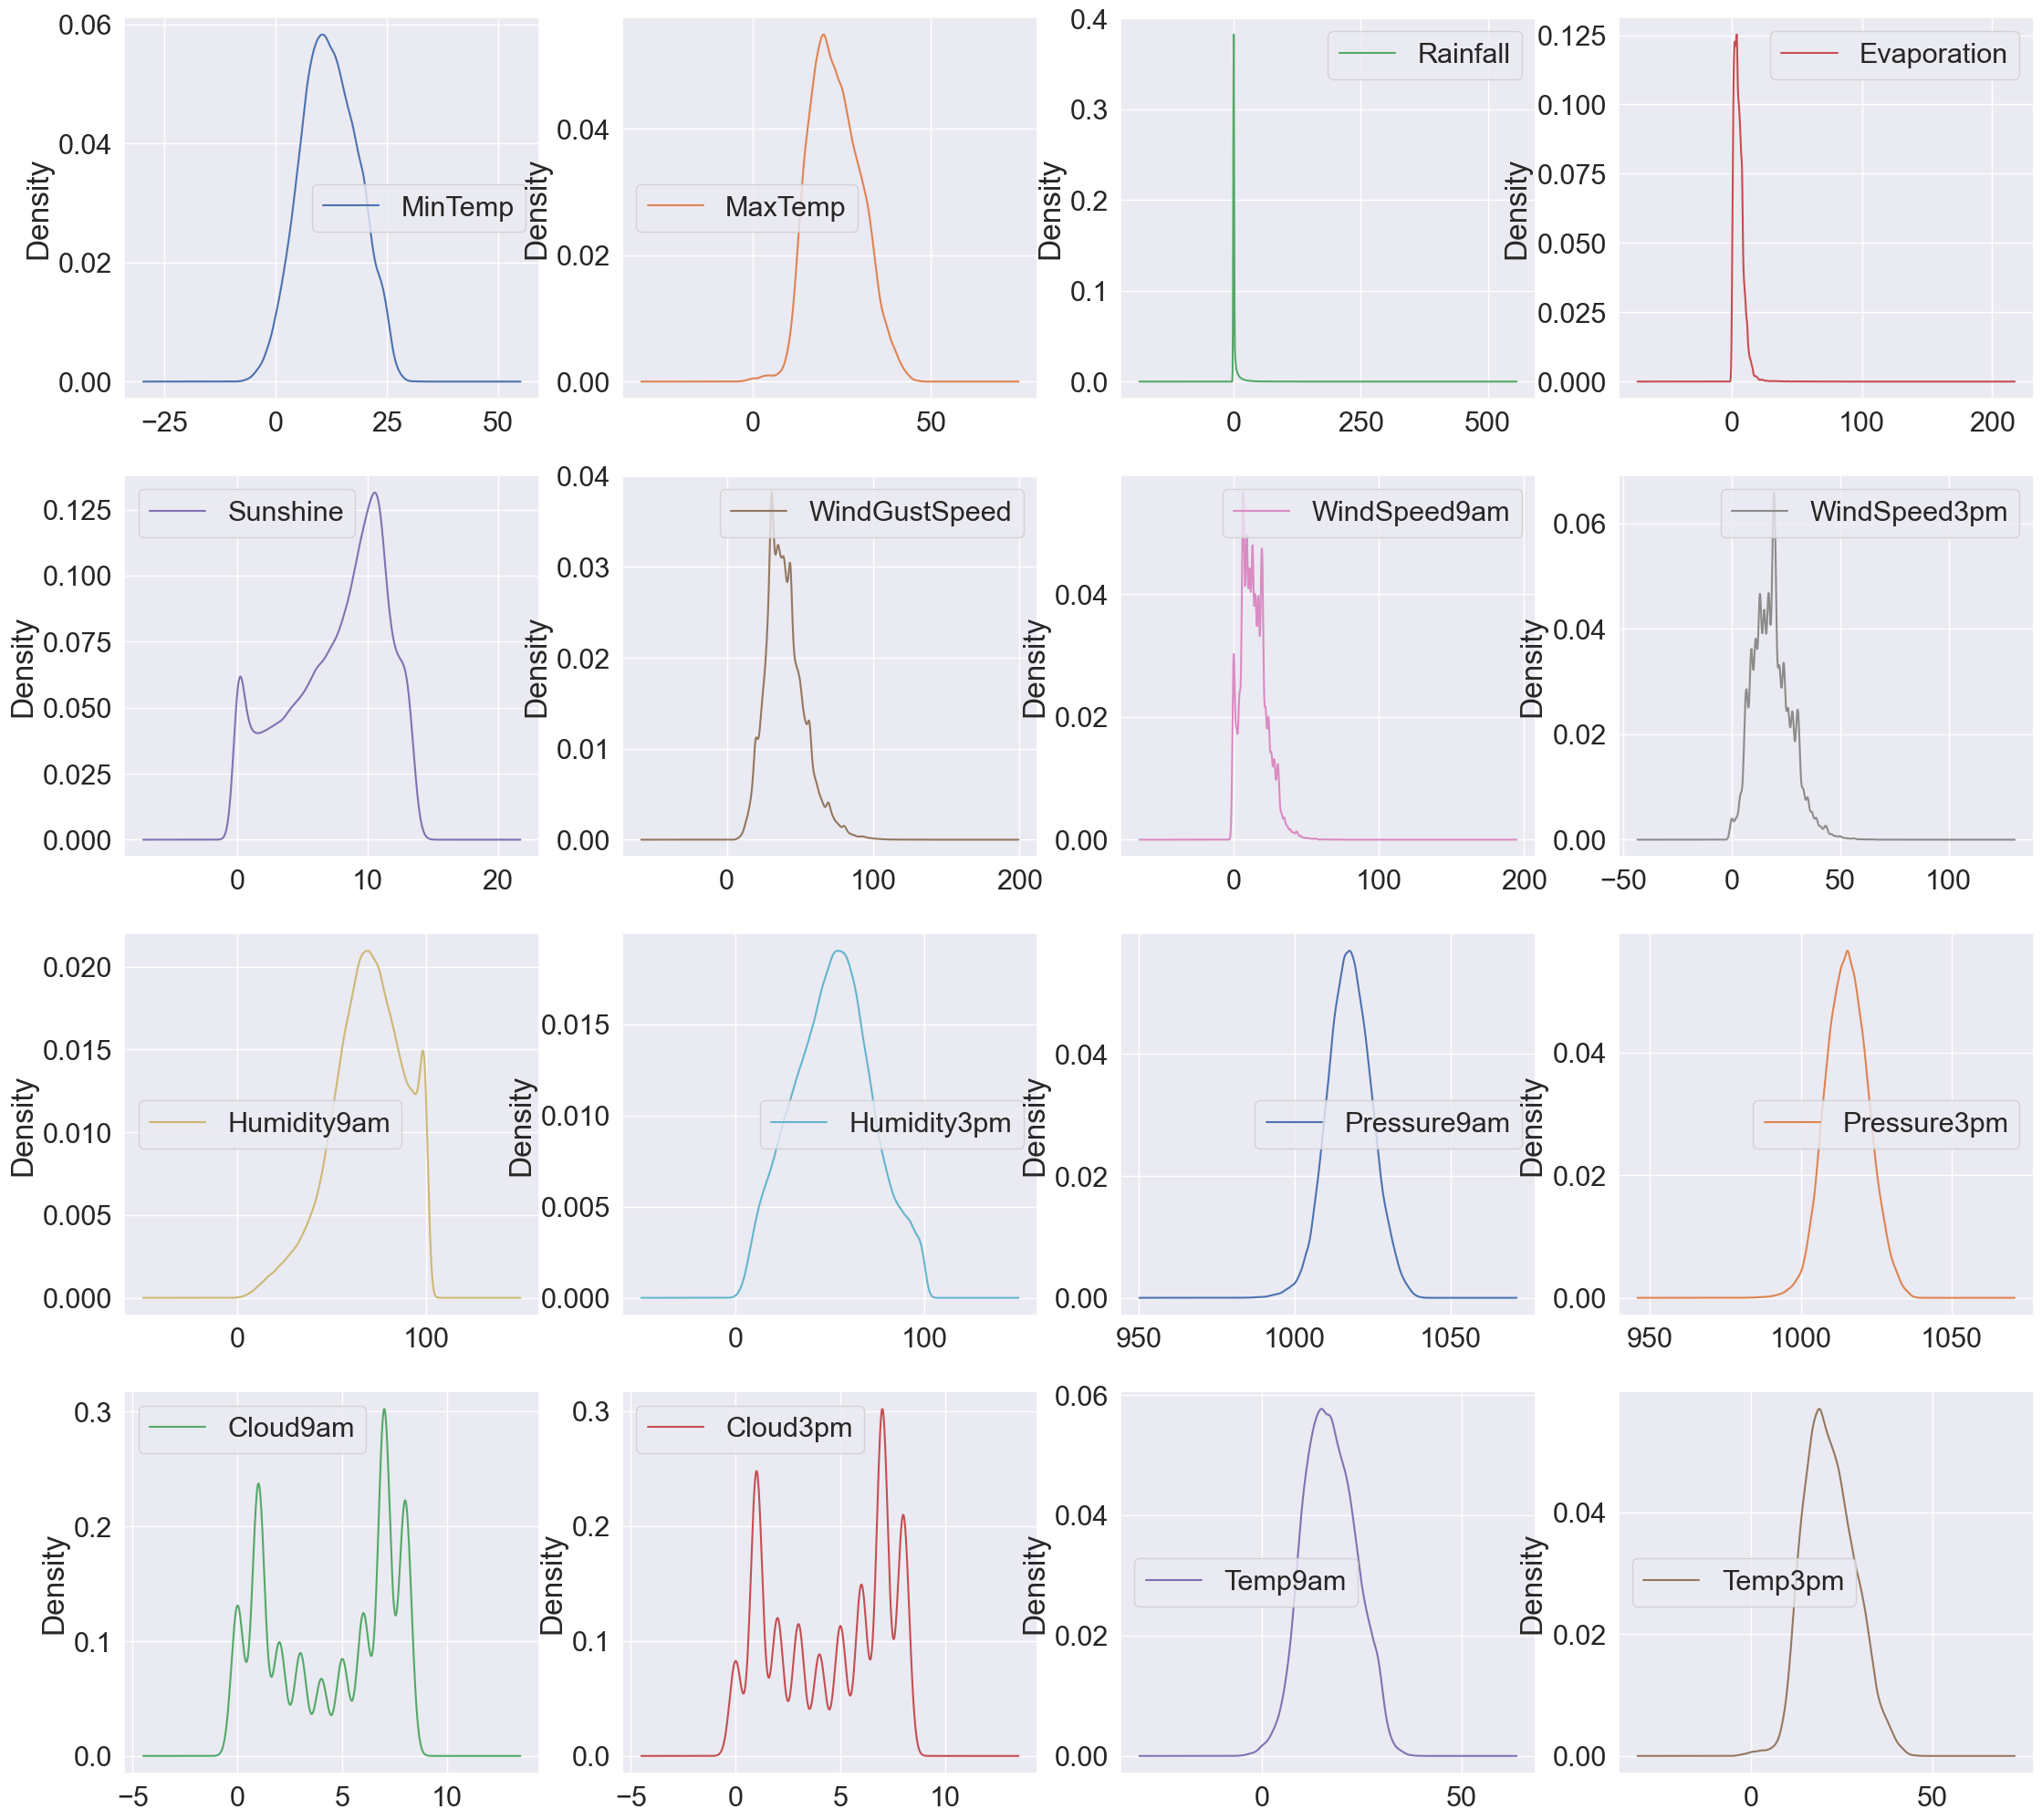

In [49]:
data_num.plot(kind="kde", subplots=True, layout=(4,4), figsize=(27,25),sharex=False, sharey=False)

## Ex 4: 

Explore the database with other plots of your choice (e.g. boxplots). 

## Data Preprocessing 

In [10]:
cat_feat=db.select_dtypes(include="object").columns
cat_feat

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [11]:
num_feat = set(db.columns)-set(cat_feat)
num_feat

{'Cloud3pm',
 'Cloud9am',
 'Date',
 'Evaporation',
 'Humidity3pm',
 'Humidity9am',
 'MaxTemp',
 'MinTemp',
 'Month',
 'Pressure3pm',
 'Pressure9am',
 'Rainfall',
 'Sunshine',
 'Temp3pm',
 'Temp9am',
 'WindGustSpeed',
 'WindSpeed3pm',
 'WindSpeed9am',
 'day',
 'year'}

In [12]:
num_feat = num_feat - set(['Date', 'year', 'Month', 'day'])
num_feat

{'Cloud3pm',
 'Cloud9am',
 'Evaporation',
 'Humidity3pm',
 'Humidity9am',
 'MaxTemp',
 'MinTemp',
 'Pressure3pm',
 'Pressure9am',
 'Rainfall',
 'Sunshine',
 'Temp3pm',
 'Temp9am',
 'WindGustSpeed',
 'WindSpeed3pm',
 'WindSpeed9am'}

In [13]:
db_cl = db.copy()
db_cl = db_cl[db_cl["RainTomorrow"].notna()]

In [14]:
len(db)

145460

In [15]:
len(db_cl)

142193

In [16]:
db.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
day                  0
year                 0
Month                0
dtype: int64

In [17]:
mean = db_cl[num_feat].mean()
for f in num_feat:
    db_cl[f].fillna(mean[f], inplace=True)

In [18]:
db_cl.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
day                  0
year                 0
Month                0
dtype: int64

In [19]:
db_cl = db_cl[db_cl["RainToday"].notna()]

In [20]:
db_cl.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      9163
WindGustSpeed       0
WindDir9am       9660
WindDir3pm       3670
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
day                 0
year                0
Month               0
dtype: int64

In [21]:
for f in ["WindGustDir", "WindDir9am", "WindDir3pm"]:
    db_cl[f].fillna(db_cl[f].mode()[0],inplace=True)

In [22]:
db_cl = pd.get_dummies(data=db_cl, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [23]:
db_cl.replace(['No','Yes'], [0,1],inplace=True)

In [24]:
db_cl.drop('Date',axis=1,inplace=True)
db_cl.drop('Location',axis=1,inplace=True)
db_cl.drop('year',axis=1,inplace=True)
db_cl.drop('Month',axis=1,inplace=True)
db_cl.drop('day',axis=1,inplace=True)

In [25]:
db_cl.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SSE', 'WindDir9am_SSW',
       'WindDir9am_SW', 'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW',
       'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N',
       'WindDir3pm_NE', 'Win

## Ex 5: 

Different ways of handling NaNs? Different strategies for encoding categorical variables? Are all features really needed? (Look at SelectKBest function in sklearn). The initial exploratory analysis can help us understanding the relationships between inputs (and transformations/combinations of them) and the target. Can you design new feature which might help getting higher scores (feature engineering)? Change the preprocessing pipeline and see how it affects the performance of the models. 

## Baseline model 

In [26]:
baseline = BaselineRain()

In [27]:
np.unique(db_cl["RainToday"].values, return_counts=True)

(array([0, 1], dtype=int64), array([109332,  31455], dtype=int64))

In [28]:
baseline.predict(db_cl["RainToday"].values)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
print("Baseline: ", classification_report(db_cl["RainTomorrow"].values, baseline.predict(db_cl["RainToday"].values)))

Baseline:                precision    recall  f1-score   support

           0       0.85      0.85      0.85    109586
           1       0.46      0.47      0.47     31201

    accuracy                           0.76    140787
   macro avg       0.66      0.66      0.66    140787
weighted avg       0.76      0.76      0.76    140787



In [30]:
X = db_cl.drop(columns=["RainTomorrow"])
y = db_cl["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (98550, 65)
Y train shape:  (98550,)
X test shape:  (42237, 65)
Y test shape:  (42237,)


## ML models 

### Decision Tree

In [117]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [118]:
print("Decision Tree: ", classification_report(y_test, dtree.predict(X_test)))

Decision Tree:                precision    recall  f1-score   support

           0       0.86      0.95      0.90     32820
           1       0.71      0.46      0.56      9417

    accuracy                           0.84     42237
   macro avg       0.79      0.70      0.73     42237
weighted avg       0.83      0.84      0.83     42237



C:\Users\unknown\Anaconda3\envs\polito\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


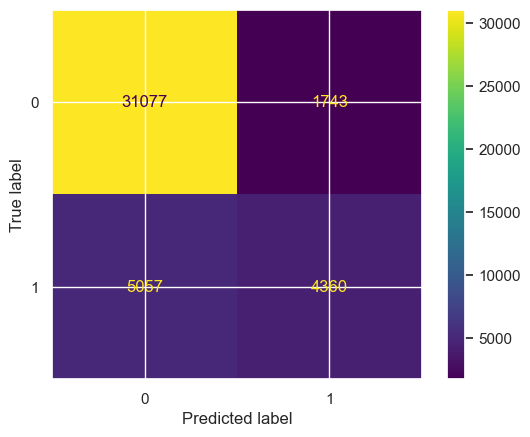

In [119]:
plot_confusion_matrix(dtree, X_test,y_test)

### Logistic Regression


In [41]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\unknown\Anaconda3\envs\polito\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
print("Logistic Regression: ", classification_report(y_test, lr.predict(X_test)))

Logistic Regression:                precision    recall  f1-score   support

           0       0.87      0.95      0.90     32820
           1       0.72      0.49      0.58      9417

    accuracy                           0.84     42237
   macro avg       0.79      0.72      0.74     42237
weighted avg       0.83      0.84      0.83     42237



C:\Users\unknown\Anaconda3\envs\polito\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


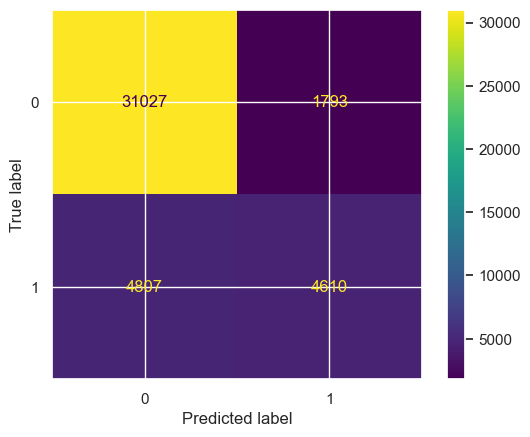

In [43]:
plot_confusion_matrix(lr, X_test,y_test)

### Random Forest

In [44]:
rf = RandomForestClassifier(n_estimators=150, max_depth=8, class_weight={0: 0.4, 1: 0.6}, min_samples_leaf=5)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.4, 1: 0.6}, max_depth=8,
                       min_samples_leaf=5, n_estimators=150)

In [45]:
print("Random Forest: ", classification_report(y_test, rf.predict(X_test)))

Random Forest:                precision    recall  f1-score   support

           0       0.87      0.94      0.90     32820
           1       0.71      0.51      0.59      9417

    accuracy                           0.84     42237
   macro avg       0.79      0.72      0.75     42237
weighted avg       0.83      0.84      0.83     42237



C:\Users\unknown\Anaconda3\envs\polito\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


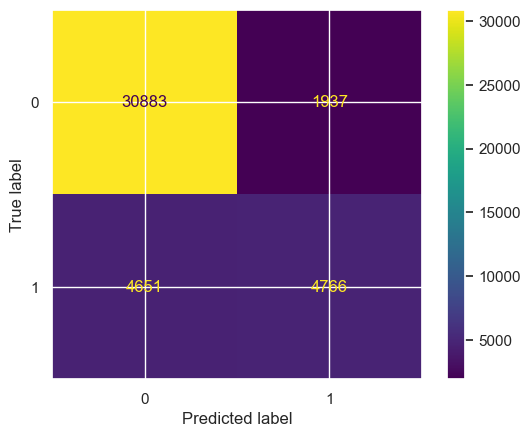

In [48]:
plot_confusion_matrix(rf, X_test,y_test)

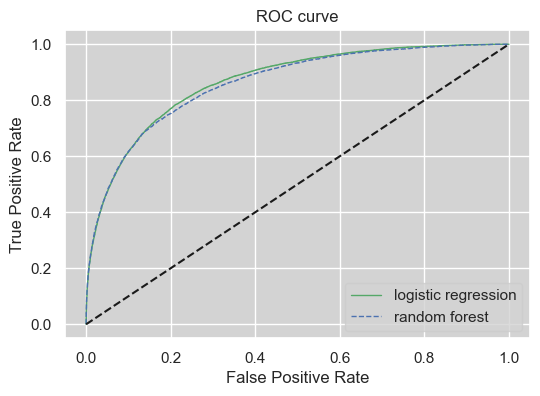

In [55]:
y_pred_logreg_proba = lr.predict_proba(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)

fpr0, tpr0, thresholds0 = roc_curve(y_test, y_pred_logreg_proba[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_rf_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr0,tpr0,'-g',linewidth=1)
plt.plot(fpr1,tpr1,'--b',linewidth=1)

plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.legend(["logistic regression", "random forest"])
plt.show()

## Ex 6: 

Play with the hyperparameters of RF and try to improve the scores obtained above. Beat LR by improving the ROC curve for RF. 

### Ex 7: 

Express the confusion matrix in terms of percentages or fractions. 

### Support Vector Machines

In [35]:
svm1 = SVC(kernel = 'linear', random_state = 1, C = 1.0)
svm1.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

In [36]:
print("SVM (Linear): ", classification_report(y_test, svm1.predict(X_test)))

SVM (Linear):                precision    recall  f1-score   support

           0       0.86      0.95      0.90     32820
           1       0.74      0.46      0.57      9417

    accuracy                           0.84     42237
   macro avg       0.80      0.71      0.74     42237
weighted avg       0.83      0.84      0.83     42237



C:\Users\unknown\Anaconda3\envs\polito\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


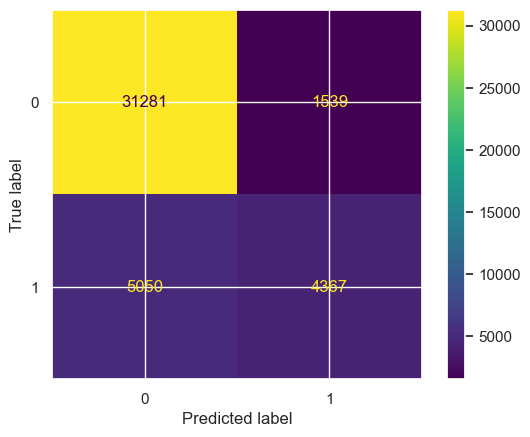

In [39]:
plot_confusion_matrix(svm1, X_test,y_test)

In [ ]:
svm2 = SVC(kernel = 'rbf', random_state = 1, C = 1.0)
svm2.fit(X_train, y_train)

In [ ]:
print("SVM (RBF): ", classification_report(y_test, svm2.predict(X_test)))

In [ ]:
svm3 = SVC(kernel = 'poly', random_state = 1, C = 1.0)
svm3.fit(X_train, y_train)

In [ ]:
print("SVM (Poly): ", classification_report(y_test, svm2.predict(X_test)))

### Gradient Boosting Machine

In [56]:
gb = lgb.LGBMClassifier()
gb.fit(X_train, y_train)

LGBMClassifier()

In [57]:
print("Gradient Boosting: ", classification_report(y_test, gb.predict(X_test)))

Gradient Boosting:                precision    recall  f1-score   support

           0       0.87      0.95      0.91     32820
           1       0.75      0.52      0.62      9417

    accuracy                           0.85     42237
   macro avg       0.81      0.74      0.76     42237
weighted avg       0.85      0.85      0.84     42237



C:\Users\unknown\Anaconda3\envs\polito\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


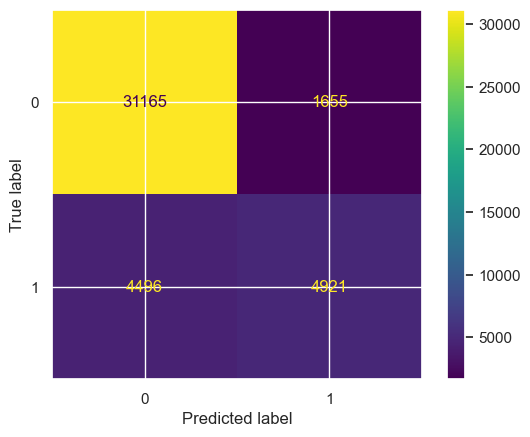

In [58]:
plot_confusion_matrix(gb, X_test,y_test)

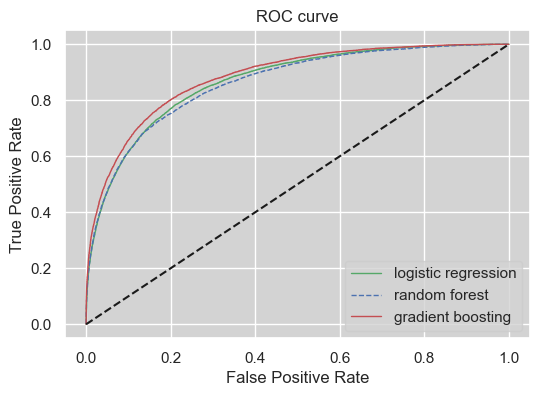

In [61]:
y_pred_lr_proba = lr.predict_proba(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)
y_pred_gb_proba = gb.predict_proba(X_test)


fpr0, tpr0, thresholds0 = roc_curve(y_test, y_pred_lr_proba[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_rf_proba[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_gb_proba[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr0,tpr0,'-g',linewidth=1)
plt.plot(fpr1,tpr1,'--b',linewidth=1)
plt.plot(fpr2,tpr2,'r',linewidth=1)


plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.legend(["logistic regression", "random forest", "gradient boosting"])
plt.show()

In [ ]:
#gb = lgb.LGBMClassifier(max_depth=6, n_estimators=500)

### Ex 8: 

Create a function that given the model and test data produce all plots and metrics that summarize the performance. 

## FCNN

In [35]:
nn = km.FCNNRain()
nn_mod = nn.initialize(65, 512, 256, "relu")

In [36]:
early_stopping = keras.callbacks.EarlyStopping( patience = 12, min_delta = 0.001,
                                               restore_best_weights =True )

nn_mod.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

# Fit the model
history = nn_mod.fit(X_train, y_train, epochs=30, batch_size=100, 
                     validation_data=(X_test, y_test),
                    verbose=1)
# evaluate the model
scores = nn_mod.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (nn_mod.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 98550 samples, validate on 42237 samples
Epoch 1/30
98550/98550 [==============================] - 6s 66us/step - loss: 0.3707 - binary_accuracy: 0.8380 - val_loss: 0.3567 - val_binary_accuracy: 0.8433
Epoch 2/30
98550/98550 [==============================] - 6s 63us/step - loss: 0.3529 - binary_accuracy: 0.8470 - val_loss: 0.3577 - val_binary_accuracy: 0.8432
Epoch 3/30
98550/98550 [==============================] - 6s 63us/step - loss: 0.3467 - binary_accuracy: 0.8491 - val_loss: 0.3537 - val_binary_accuracy: 0.8436
Epoch 4/30
98550/98550 [==============================] - 6s 65us/step - loss: 0.3425 - binary_accuracy: 0.8510 - val_loss: 0.3522 - val_binary_accuracy: 0.8466
Epoch 5/30
98550/98550 [==============================] - 6s 63us/step - loss: 0.3386 - binary_accuracy: 0.8528 - val_loss: 0.3503 - val_binary_accuracy: 0.8471
Epoch 6/30
98550/98550 [==========================

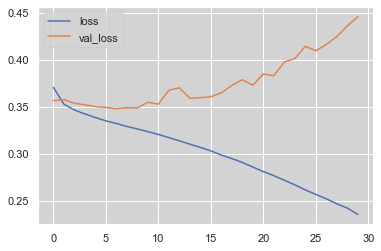

In [39]:
history_df = pd.DataFrame(history.history)
history_df[["loss","val_loss"]].plot();

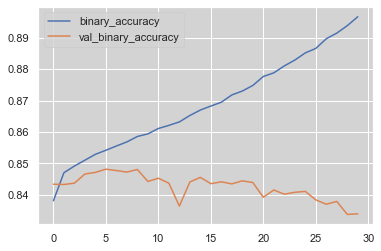

In [42]:
history_df[["binary_accuracy","val_binary_accuracy"]].plot();

In [33]:
nn1 = km.FCNNRain_Dropout()
nn_mod1 = nn1.initialize(65, 128, 64, 32, 16, "relu", 0.2)

In [34]:
early_stopping = keras.callbacks.EarlyStopping( patience = 12, min_delta = 0.001,
                                               restore_best_weights =True )

nn_mod1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

# Fit the model
history = nn_mod1.fit(X_train, y_train, epochs=30, batch_size=100, 
                     validation_data=(X_test, y_test),
                    verbose=1)
# evaluate the model
scores = nn_mod1.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (nn_mod1.metrics_names[1], scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 98550 samples, validate on 42237 samples
Epoch 1/30
98550/98550 [==============================] - 6s 64us/step - loss: 0.3861 - binary_accuracy: 0.8299 - val_loss: 0.3603 - val_binary_accuracy: 0.8422
Epoch 2/30
98550/98550 [==============================] - 6s 59us/step - loss: 0.3590 - binary_accuracy: 0.8452 - val_loss: 0.3548 - val_binary_accuracy: 0.8447
Epoch 3/30
98550/98550 [==============================] - 6s 58us/step - loss: 0.3524 - binary_accuracy: 0.8486 - val_loss: 0.3532 - val_binary_accuracy: 0.8451
Epoch 4/30
98550/98550 [==============================] - 6s 58us/step - loss: 0.3485 - binary_accuracy: 0.8494 - val_loss: 0.3510 - val_binary_accuracy: 0.8464
Epoch 5/30
98550/98550 [==============================] - 6s 57us/step - loss: 0.3449 - binary_accuracy: 0.8508 - val_loss: 0.3542 - val_binary_accuracy: 0.8458
Epoch 6/30
98550/98550 [==========================

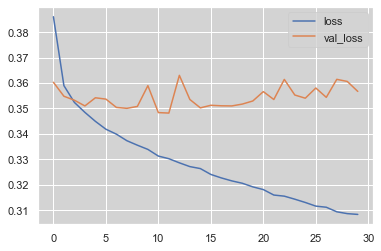

In [35]:
history_df = pd.DataFrame(history.history)
history_df[["loss","val_loss"]].plot();

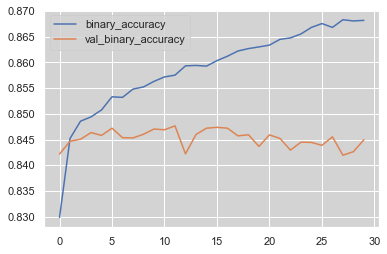

In [36]:
history_df[["binary_accuracy","val_binary_accuracy"]].plot();

In [37]:
y_pred=nn_mod1.predict(X_test)
y_pred=(y_pred>0.5)

In [38]:
print("Neural Network: ", classification_report(y_test, y_pred))

Neural Network:                precision    recall  f1-score   support

           0       0.87      0.94      0.90     32820
           1       0.71      0.52      0.60      9417

    accuracy                           0.84     42237
   macro avg       0.79      0.73      0.75     42237
weighted avg       0.84      0.84      0.84     42237



In [41]:
print(f"f1 score: {f1_score(y_test,y_pred)}")

f1 score: 0.5989710926016659


In [48]:
nn2 = km.FCNNRain_Dropout_flex()
nn_mod2 = nn2.initialize("relu", 0.25, 65, 32, 16, 8)

In [49]:
nn_mod2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 32)                2112      
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 2,785
Trainable params: 2,785
Non-trainable params: 0
____________________________________________________

In [50]:
early_stopping = keras.callbacks.EarlyStopping( patience = 12, min_delta = 0.001,
                                               restore_best_weights =True )

nn_mod2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

# Fit the model
history = nn_mod2.fit(X_train, y_train, epochs=30, batch_size=100, 
                     validation_data=(X_test, y_test),
                    verbose=1)
# evaluate the model
scores = nn_mod2.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (nn_mod2.metrics_names[1], scores[1]*100))

Train on 98550 samples, validate on 42237 samples
Epoch 1/30
98550/98550 [==============================] - 5s 52us/step - loss: 0.4291 - binary_accuracy: 0.8086 - val_loss: 0.3721 - val_binary_accuracy: 0.8373
Epoch 2/30
98550/98550 [==============================] - 4s 44us/step - loss: 0.3816 - binary_accuracy: 0.8361 - val_loss: 0.3642 - val_binary_accuracy: 0.8393
Epoch 3/30
98550/98550 [==============================] - 4s 45us/step - loss: 0.3767 - binary_accuracy: 0.8388 - val_loss: 0.3622 - val_binary_accuracy: 0.8425
Epoch 4/30
98550/98550 [==============================] - 5s 49us/step - loss: 0.3727 - binary_accuracy: 0.8394 - val_loss: 0.3590 - val_binary_accuracy: 0.8429
Epoch 5/30
98550/98550 [==============================] - 4s 45us/step - loss: 0.3718 - binary_accuracy: 0.8391 - val_loss: 0.3583 - val_binary_accuracy: 0.8435
Epoch 6/30
98550/98550 [==============================] - 4s 46us/step - loss: 0.3693 - binary_accuracy: 0.8415 - val_loss: 0.3558 - val_binary_a

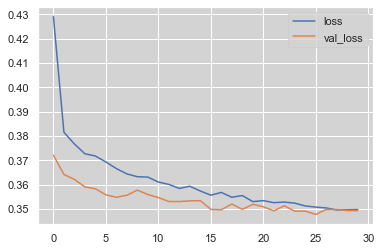

In [51]:
history_df = pd.DataFrame(history.history)
history_df[["loss","val_loss"]].plot();

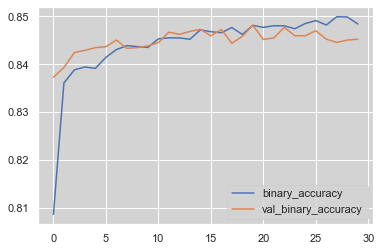

In [52]:
history_df[["binary_accuracy","val_binary_accuracy"]].plot();

In [53]:
y_pred=nn_mod2.predict(X_test)
y_pred=(y_pred>0.5)

In [54]:
print("Neural Network: ", classification_report(y_test, y_pred))

Neural Network:                precision    recall  f1-score   support

           0       0.85      0.96      0.91     32820
           1       0.78      0.43      0.55      9417

    accuracy                           0.85     42237
   macro avg       0.82      0.70      0.73     42237
weighted avg       0.84      0.85      0.83     42237



In [55]:
print(f"f1 score: {f1_score(y_test,y_pred)}")

f1 score: 0.5522060838585915


### Ex 9: 

Change the NN architecture as well as the hyperparameters and try to fight overfitting while improving overall scores on test set. 

### Ex 10: 

Why will it rain tomorrow? Or, in other words, which features is the model relying on to predict that it will rain? There's a whole field called explainable AI whose objective is making ML models more transparent and understandable to humans. Have a look at the literature (hint: https://christophm.github.io/interpretable-ml-book/ ) and pick one method of your choice and try to "explain" the predictions of your favourite model. Starting point: take a look at the attribute feature_importances_ of Random Forest Classifier in sklearn. 

### Ex 11: 

The dataset contains records of rain for many subsequent days for the same location. We completely ignored the temporal and spatial dimensions of the data and treated all rows equally as iid. However, there will be locations where it rains more (for geomorphological reasons) and, most importantly, records for the same location (or closeby ones) over a certain number of days will be correlated. Try to explore these issues. In the light of this, can you design a better sampling strategy? Starting point: we would like to have a similar representation of all cities in train and test data. 

### Ex 12: 

So far we treated the problem as a static one and ignored possible time correlations (e.g. seasonal patterns or simply short-term effects, e.g. if it was sunny for 5 consecutive days then it's likely that it won't rain also the following day). Reframe the problem as a time series forecasting task. After having properly defined the inputs, train a simple LSTM to predict whether it will rain. 